# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import pandas as pd

df = pd.read_csv('./data/house_prices.csv', index_col='Id')
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
assert df.shape == (1460, 80)

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

Коэффициент эксцесса для SalePrice: 6.51


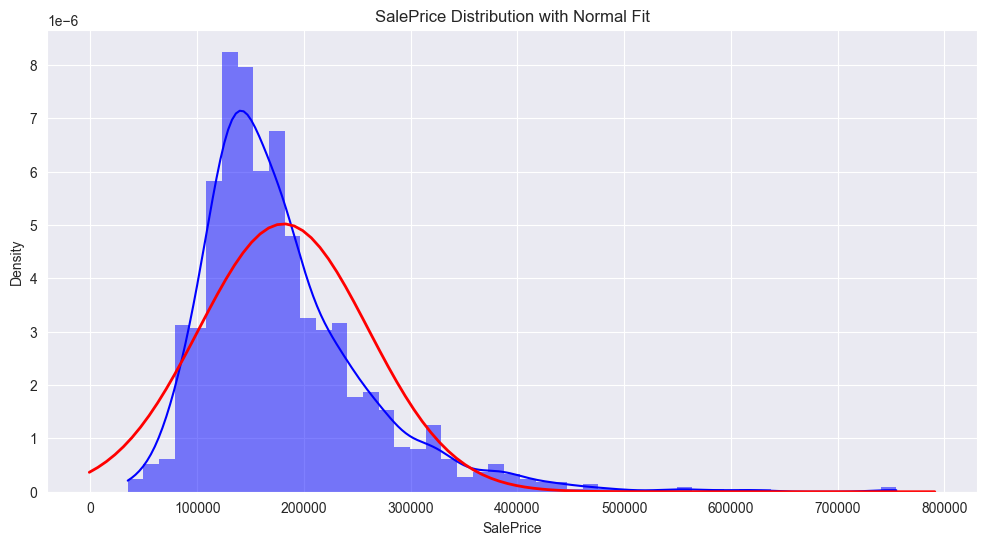

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, kurtosis, probplot

df = pd.read_csv('data/house_prices.csv', index_col='Id')

plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, stat="density", linewidth=0, color="blue")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['SalePrice'].mean(), df['SalePrice'].std())
plt.plot(x, p, 'r', linewidth=2)
plt.title('SalePrice Distribution with Normal Fit')
plt.xlabel('SalePrice')
plt.ylabel('Density')

kurt_value = kurtosis(df['SalePrice'])
print(f"Коэффициент эксцесса для SalePrice: {kurt_value:.2f}")

plt.show()

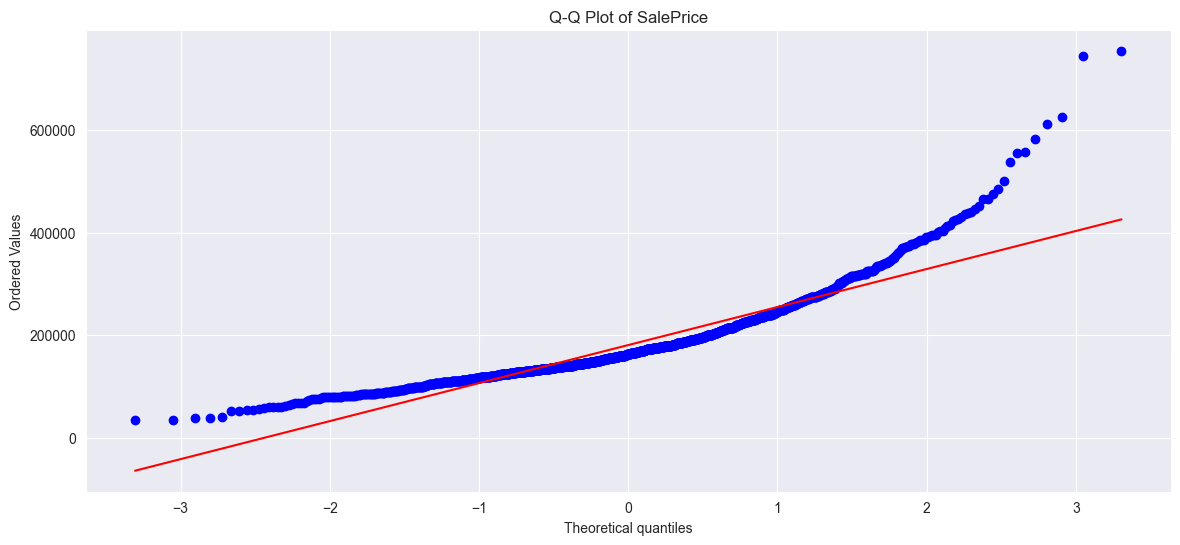

Распределение имеет положительный эксцесс, что указывает на наличие тяжелых хвостов и острого пика.
На основе Q-Q графика можно заметить следующие моменты:
- Если точки лежат примерно на прямой, то распределение `SalePrice` похоже на нормальное.
- Отклонения от прямой на концах графика указывают на наличие выбросов или длинных хвостов.


In [58]:
plt.figure(figsize=(14, 6))
probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title("Q-Q Plot of SalePrice")
plt.show()

if kurt_value > 0:
    print("Распределение имеет положительный эксцесс, что указывает на наличие тяжелых хвостов и острого пика.")
elif kurt_value < 0:
    print("Распределение имеет отрицательный эксцесс, что указывает на более пологое распределение с меньшим числом экстремальных значений.")
else:
    print("Распределение близко к нормальному, так как коэффициент эксцесса равен примерно 0.")

print("На основе Q-Q графика можно заметить следующие моменты:")
print("- Если точки лежат примерно на прямой, то распределение `SalePrice` похоже на нормальное.")
print("- Отклонения от прямой на концах графика указывают на наличие выбросов или длинных хвостов.")


## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

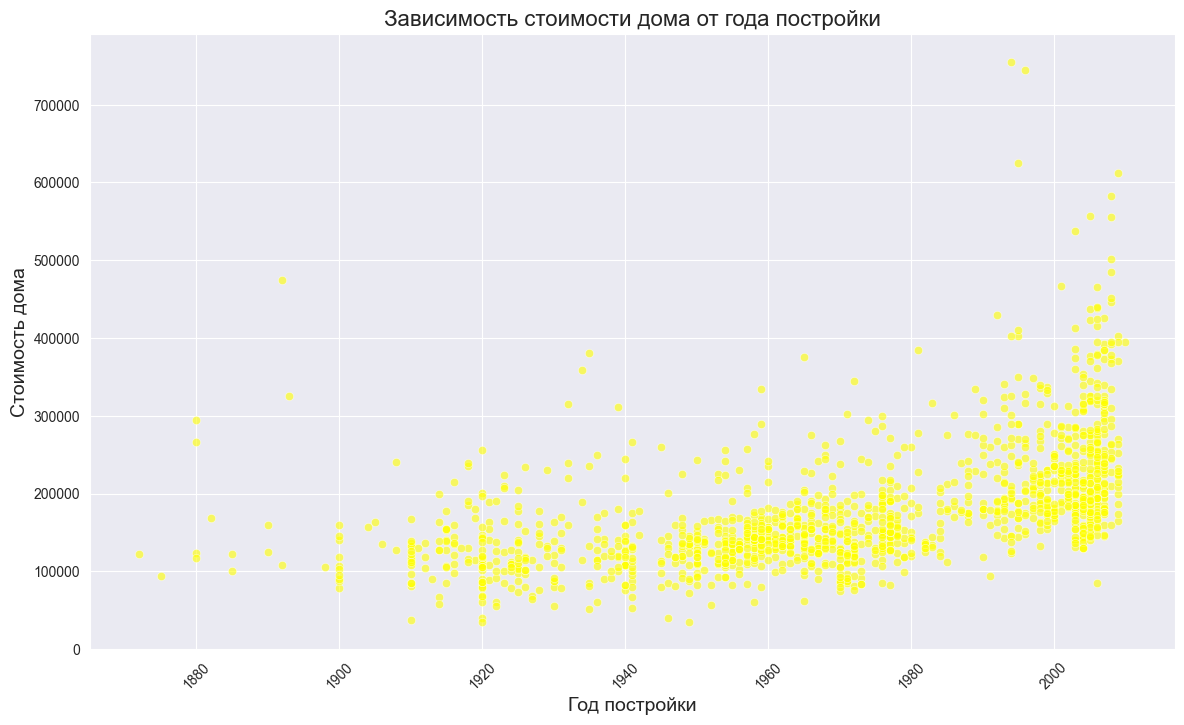

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', alpha=0.6, color='yellow')

plt.title('Зависимость стоимости дома от года постройки', fontsize=16)
plt.xlabel('Год постройки', fontsize=14)
plt.ylabel('Стоимость дома', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


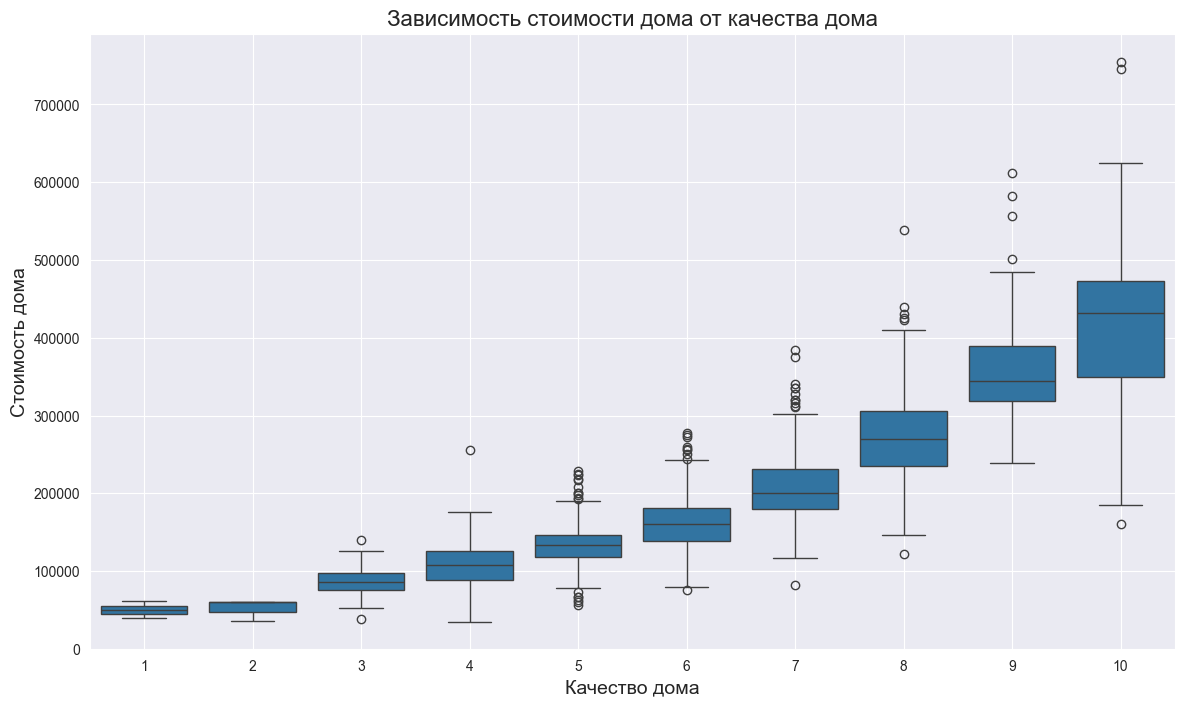

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='OverallQual', y='SalePrice')  

plt.title('Зависимость стоимости дома от качества дома', fontsize=16)
plt.xlabel('Качество дома', fontsize=14)
plt.ylabel('Стоимость дома', fontsize=14)
plt.grid(True)
plt.show()


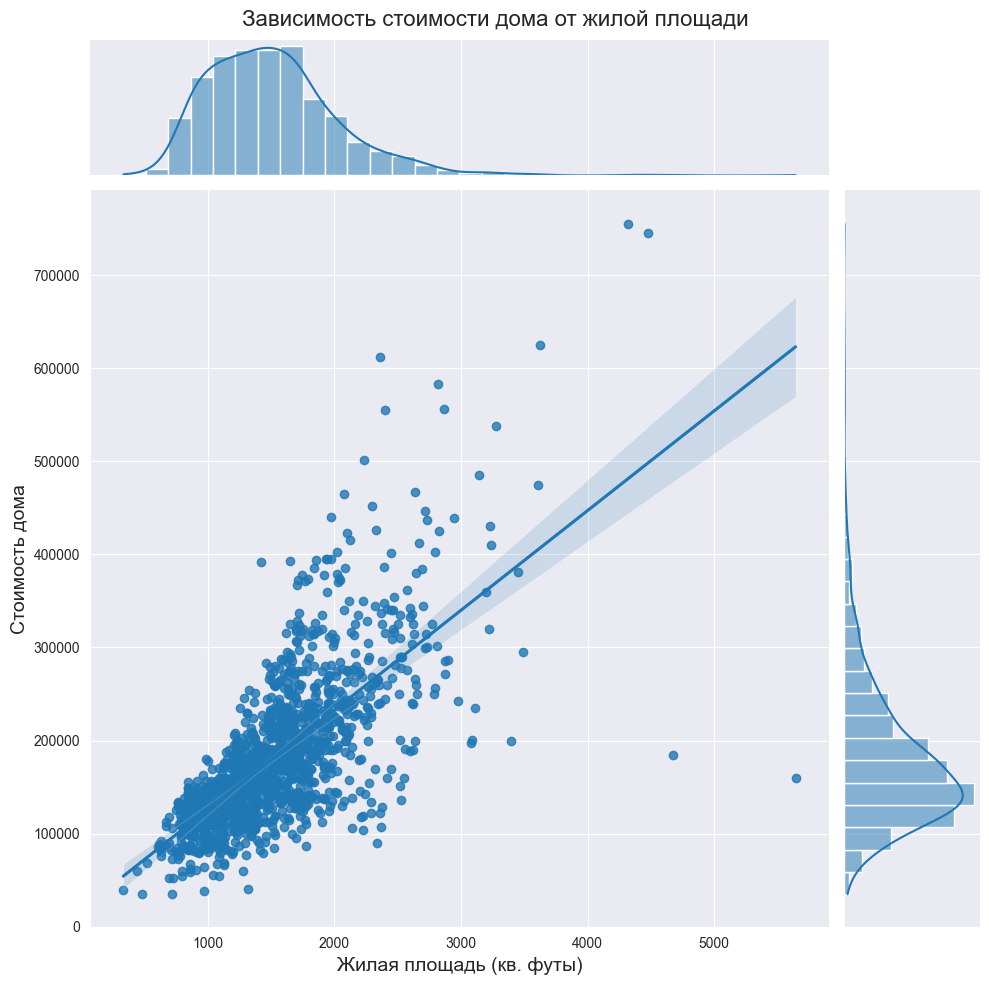

In [12]:
sns.jointplot(data=df, x='GrLivArea', y='SalePrice', kind='reg', height=10, marginal_kws=dict(bins=30, fill=True))

plt.suptitle('Зависимость стоимости дома от жилой площади', fontsize=16)
plt.xlabel('Жилая площадь (кв. футы)', fontsize=14)
plt.ylabel('Стоимость дома', fontsize=14)
plt.tight_layout()
plt.show()


## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

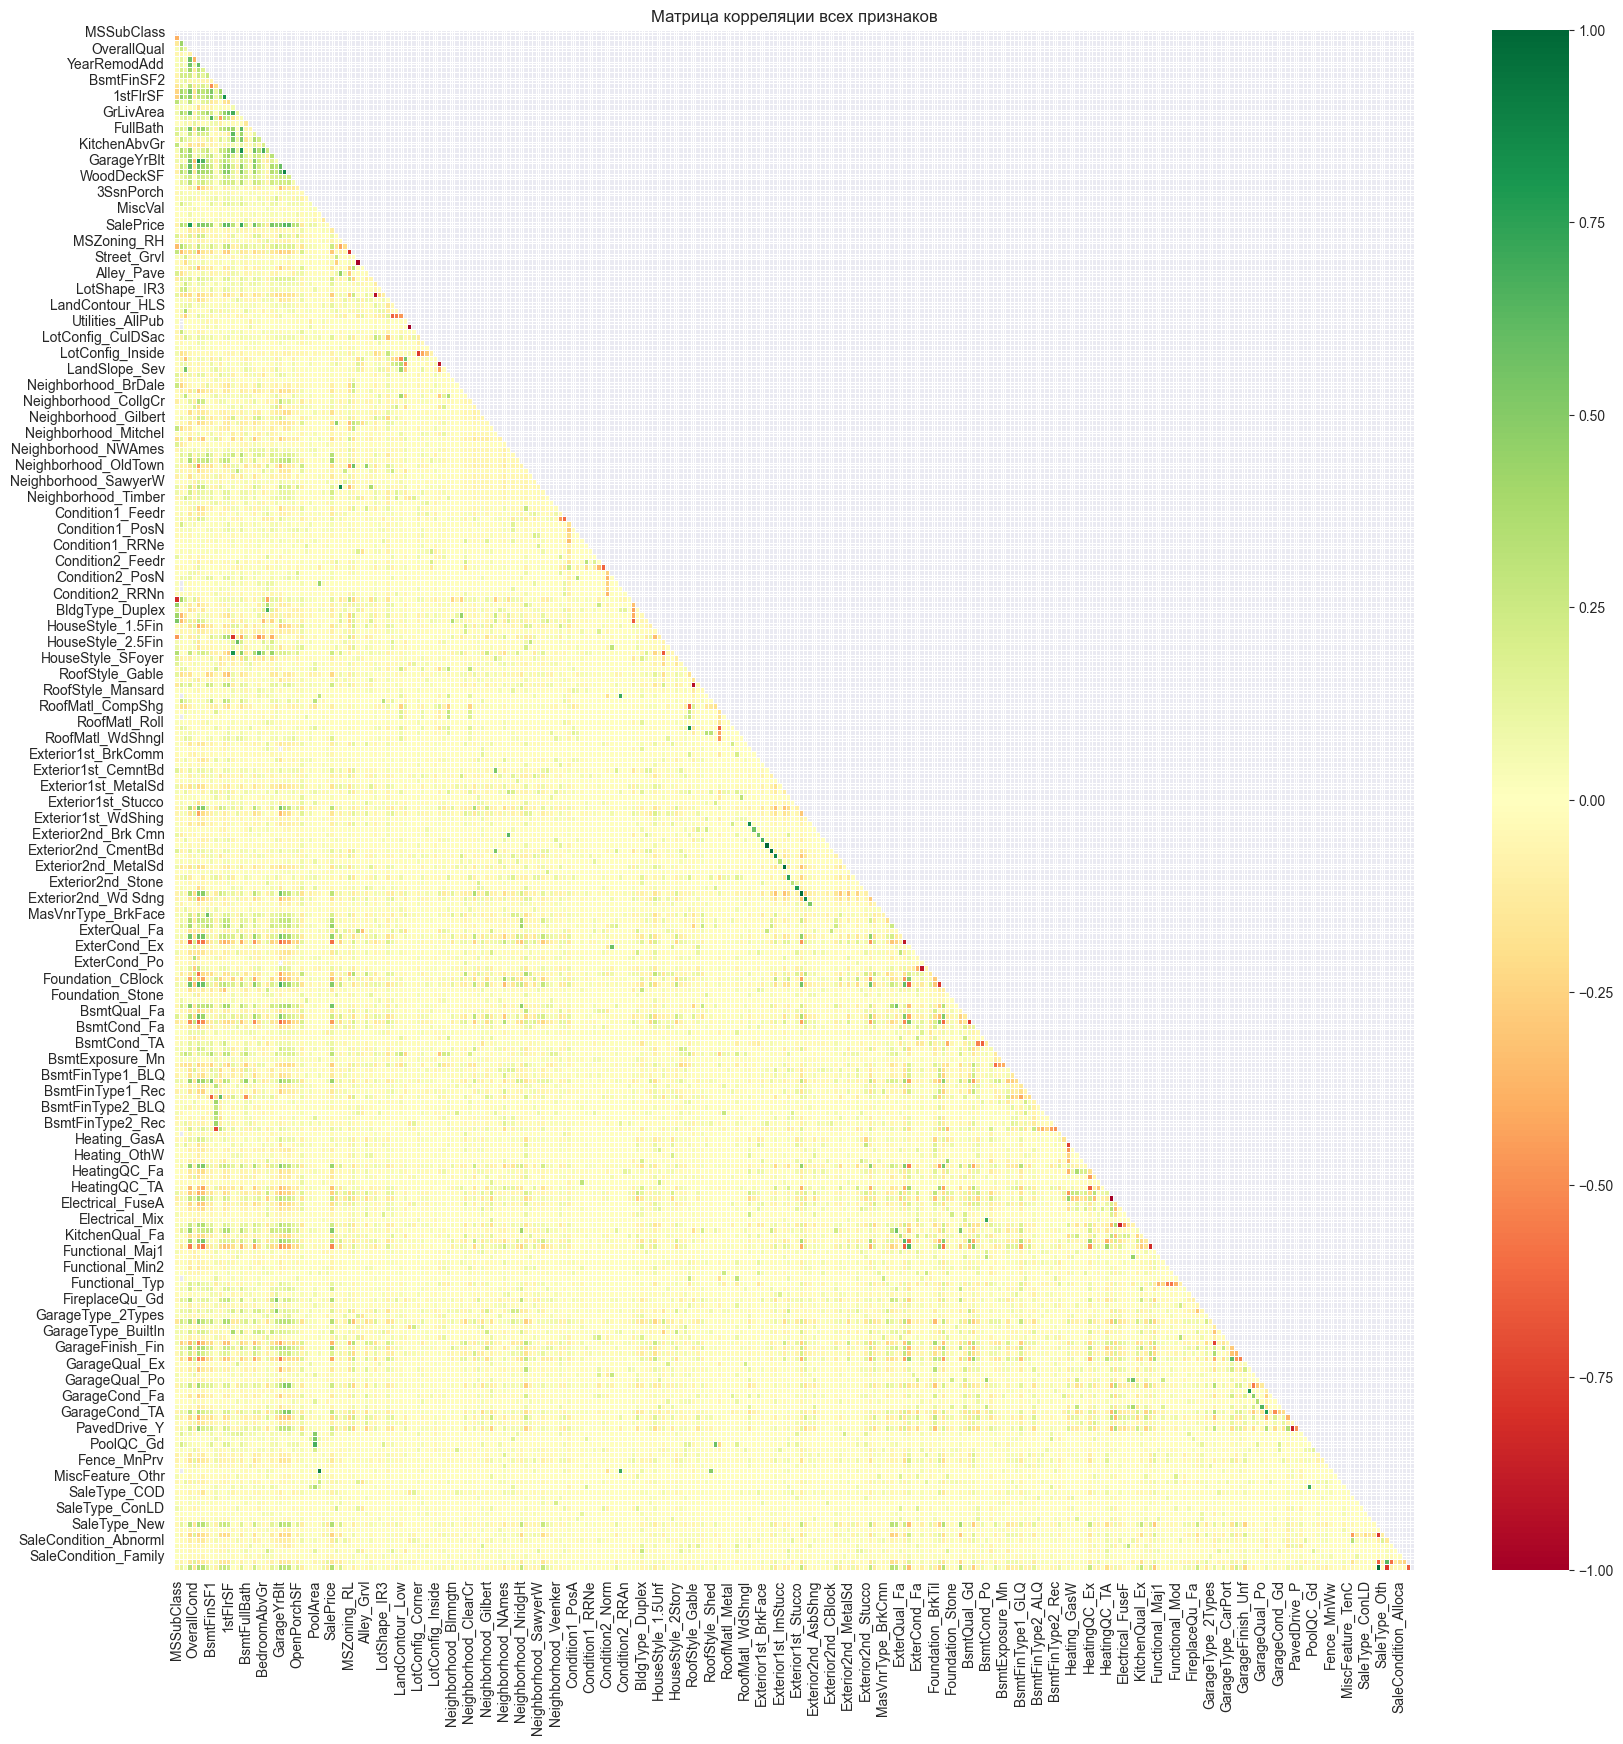

In [37]:
import seaborn as sns

df_numeric = pd.get_dummies(df)

corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cmap='RdYlGn', annot=False, linewidths=0.5)
plt.title('Матрица корреляции всех признаков')
plt.show()


Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

Сильно коррелируемые признаки:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object')


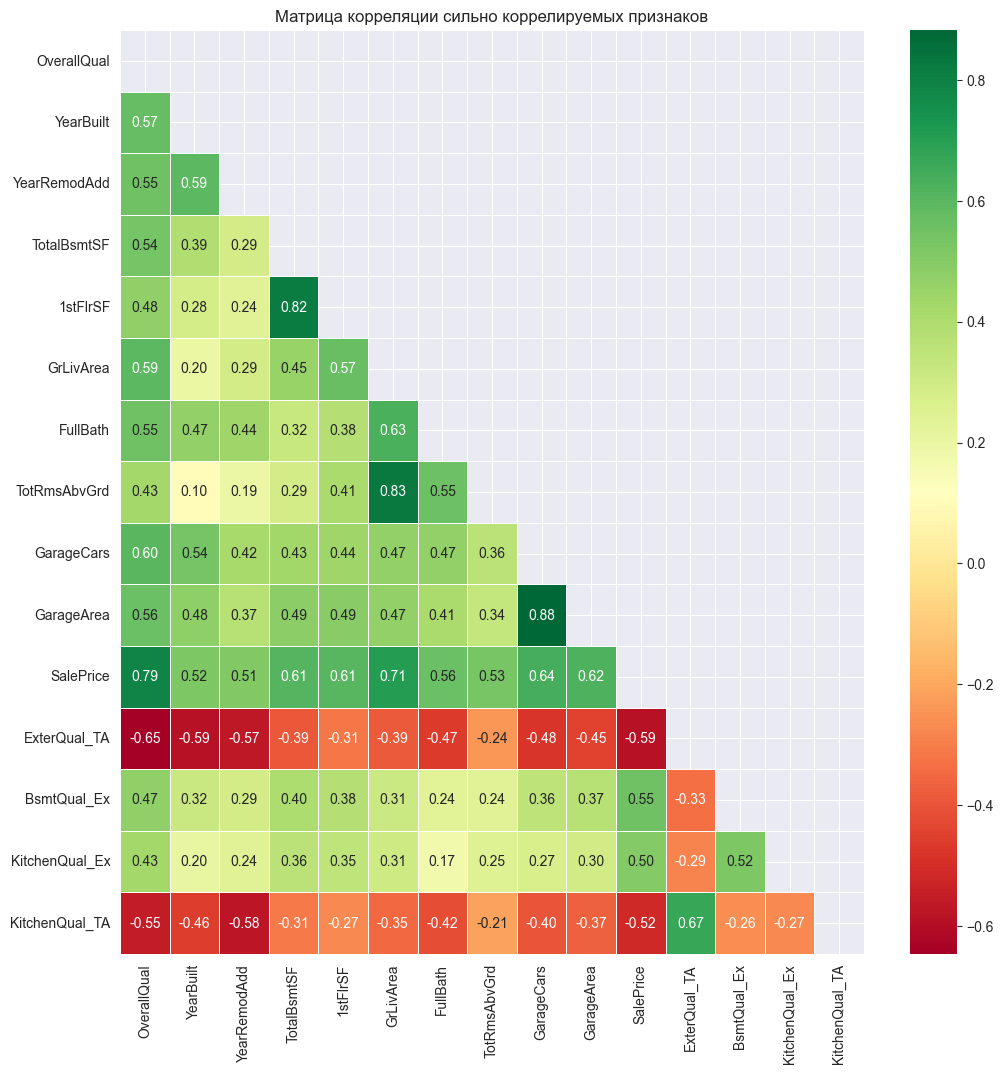

In [38]:
strong_corr = corr_matrix[abs(corr_matrix["SalePrice"]) > 0.5].index
print("Сильно коррелируемые признаки:\n", strong_corr)

strong_corr_matrix = corr_matrix.loc[strong_corr, strong_corr]

mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 12))
sns.heatmap(strong_corr_matrix, mask=mask, cmap='RdYlGn', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции сильно коррелируемых признаков')
plt.show()


## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [39]:
import pandas as pd

df = pd.read_csv('./data/house_prices.csv', index_col='Id')

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({'Total Missing': missing_data, 'Percentage Missing': missing_percentage})
print("Общее количество пропущенных данных и их доля:\n", missing_info[missing_info['Total Missing'] > 0])

threshold = 10
columns_to_drop = missing_info[missing_info['Percentage Missing'] > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

print(f"\nУдалены признаки с более чем {threshold}% пропущенных данных:\n", list(columns_to_drop))


Общее количество пропущенных данных и их доля:
               Total Missing  Percentage Missing
LotFrontage             259           17.739726
Alley                  1369           93.767123
MasVnrType              872           59.726027
MasVnrArea                8            0.547945
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtFinType2             38            2.602740
Electrical                1            0.068493
FireplaceQu             690           47.260274
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
PoolQC                 1453           99.520548
Fence                  1179           80.753425
MiscFeature            1406           96

In [40]:
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = df[column].fillna('unknown')
    elif df[column].dtype == 'float64':
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

remaining_missing = df.isnull().sum()
print("\nОставшиеся пропущенные значения после заполнения:\n", remaining_missing[remaining_missing > 0])



Оставшиеся пропущенные значения после заполнения:
 Series([], dtype: int64)


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [41]:
df_with_dummies = pd.get_dummies(df, drop_first=True)  # drop_first=True для избежания дамми-ловушки

print(f"Общее количество признаков после преобразования: {df_with_dummies.shape[1]}")


Общее количество признаков после преобразования: 239


In [42]:
y = df_with_dummies['SalePrice']
X = df_with_dummies.drop(columns=['SalePrice'])

print(f"Размер переменной X: {X.shape}")
print(f"Размер переменной y: {y.shape}")

print("Признаки, которые были преобразованы в числовые:\n", df.select_dtypes(include=['object']).columns.tolist())


Размер переменной X: (1460, 238)
Размер переменной y: (1460,)
Признаки, которые были преобразованы в числовые:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

coefficients = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Coefficient'] = coef_df['Coefficient'].round(2)

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values().index)

for index, row in coef_df.iterrows():
    print(f"Признак: {row['Feature']}, Коэффициент: {row['Coefficient']}")


Признак: MiscVal, Коэффициент: 0.12
Признак: LotArea, Коэффициент: 0.76
Признак: BsmtUnfSF, Коэффициент: -1.92
Признак: OpenPorchSF, Коэффициент: 2.53
Признак: EnclosedPorch, Коэффициент: 4.41
Признак: BsmtFinSF2, Коэффициент: 7.02
Признак: WoodDeckSF, Коэффициент: 13.41
Признак: MasVnrArea, Коэффициент: 13.43
Признак: 1stFlrSF, Коэффициент: 15.37
Признак: BsmtFinSF1, Коэффициент: 17.42
Признак: GarageArea, Коэффициент: 18.38
Признак: LowQualFinSF, Коэффициент: -19.53
Признак: MSSubClass, Коэффициент: -19.79
Признак: TotalBsmtSF, Коэффициент: 22.52
Признак: ScreenPorch, Коэффициент: 28.59
Признак: GarageYrBlt, Коэффициент: -30.18
Признак: GrLivArea, Коэффициент: 31.15
Признак: 3SsnPorch, Коэффициент: 31.41
Признак: 2ndFlrSF, Коэффициент: 35.32
Признак: CentralAir_Y, Коэффициент: 62.34
Признак: PavedDrive_Y, Коэффициент: 83.14
Признак: PoolArea, Коэффициент: 85.11
Признак: YearRemodAdd, Коэффициент: 100.63
Признак: GarageFinish_Unf, Коэффициент: 103.16
Признак: HeatingQC_Fa, Коэффициент

In [44]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

mse_scores = -mse_scores

print(f"Средняя ошибка предсказания (MSE) на 5 фолдах: {mse_scores.mean():.2f}")

print("\nАнализ коэффициентов:")
for index, row in coef_df.iterrows():
    if row['Coefficient'] < -500000:
        print(f"Внимание! Признак '{row['Feature']}' имеет большой отрицательный коэффициент: {row['Coefficient']}. Это может указывать на потенциальные выбросы или сильную корреляцию с другими признаками.")

zero_coef_count = (coef_df['Coefficient'] == 0).sum()
if zero_coef_count > 0:
    print(f"Замечено {zero_coef_count} признаков с нулевыми коэффициентами. Это может быть связано с отсутствием значимой информации для модели или избыточностью признаков.")
else:
    print("Нет признаков с нулевыми коэффициентами.")


Средняя ошибка предсказания (MSE) на 5 фолдах: 2020713369.74

Анализ коэффициентов:
Нет признаков с нулевыми коэффициентами.


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alpha_values = np.arange(1, 501, 10)

lasso_coefficients = []
ridge_coefficients = []


In [46]:
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_scaled, y)
    lasso_coefficients.append(lasso_model.coef_)

    ridge_model = Ridge(alpha=alpha, max_iter=10000)
    ridge_model.fit(X_scaled, y)
    ridge_coefficients.append(ridge_model.coef_)


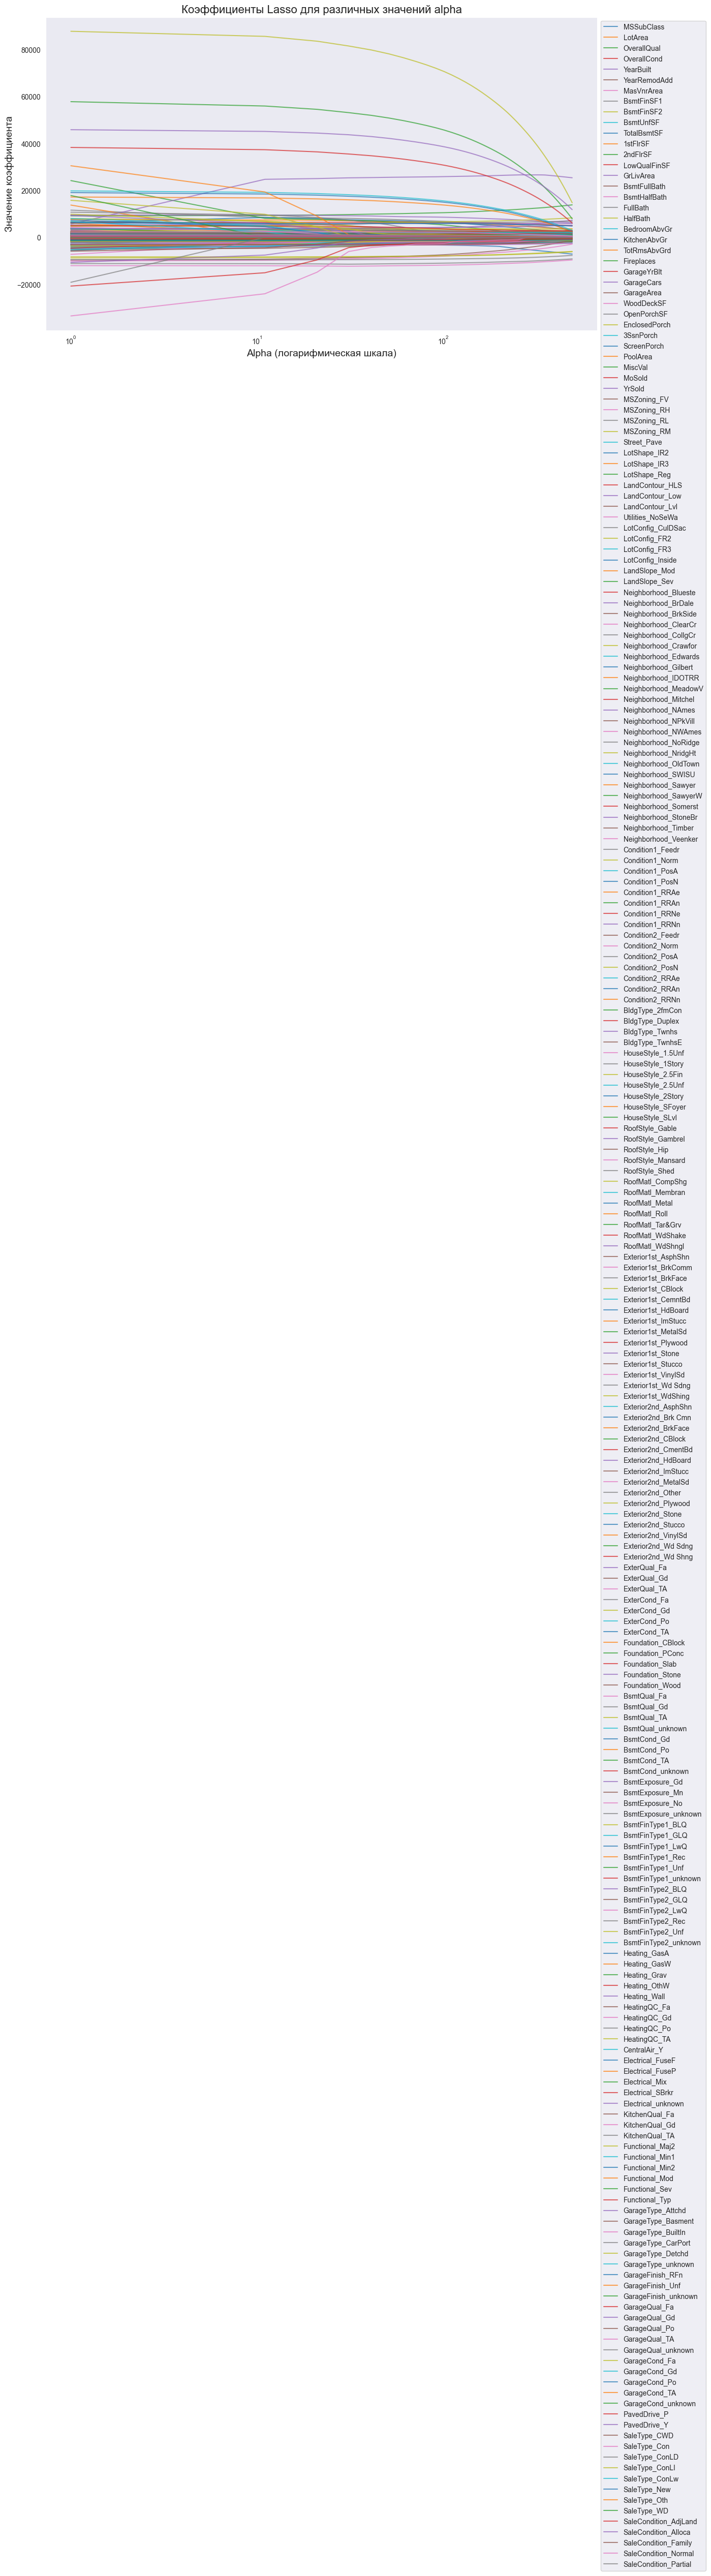

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

lasso_coefficients = np.array(lasso_coefficients)
ridge_coefficients = np.array(ridge_coefficients)

for i in range(lasso_coefficients.shape[1]):
    plt.plot(alpha_values, lasso_coefficients[:, i], label=X.columns[i], alpha=0.7)

plt.title('Коэффициенты Lasso для различных значений alpha', fontsize=16)
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)', fontsize=14)
plt.ylabel('Значение коэффициента', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid()
plt.show()


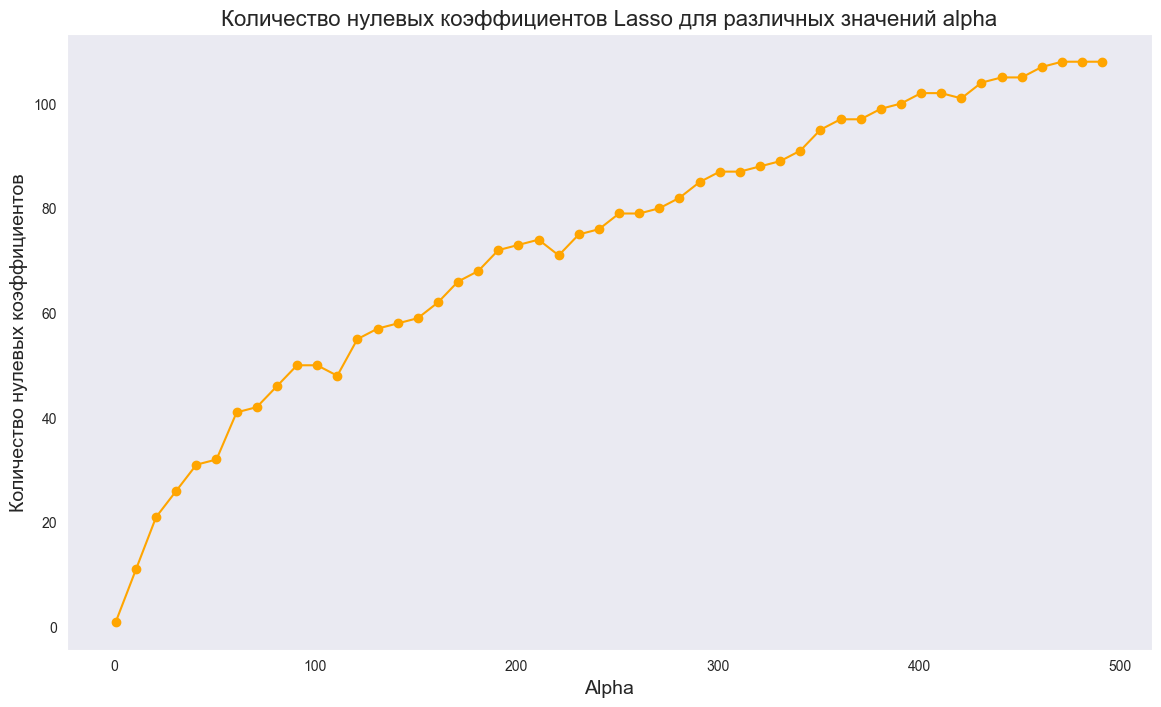

In [48]:
zero_coefficients_count = []

for lasso_coef in lasso_coefficients:
    count_zero = np.sum(np.abs(lasso_coef) < 0.0001)
    zero_coefficients_count.append(count_zero)

plt.figure(figsize=(14, 8))
plt.plot(alpha_values, zero_coefficients_count, marker='o', color='orange')
plt.title('Количество нулевых коэффициентов Lasso для различных значений alpha', fontsize=16)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Количество нулевых коэффициентов', fontsize=14)
plt.grid()
plt.show()


## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [49]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X, y)

print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")


Оптимальное значение alpha: 209067.7746829921


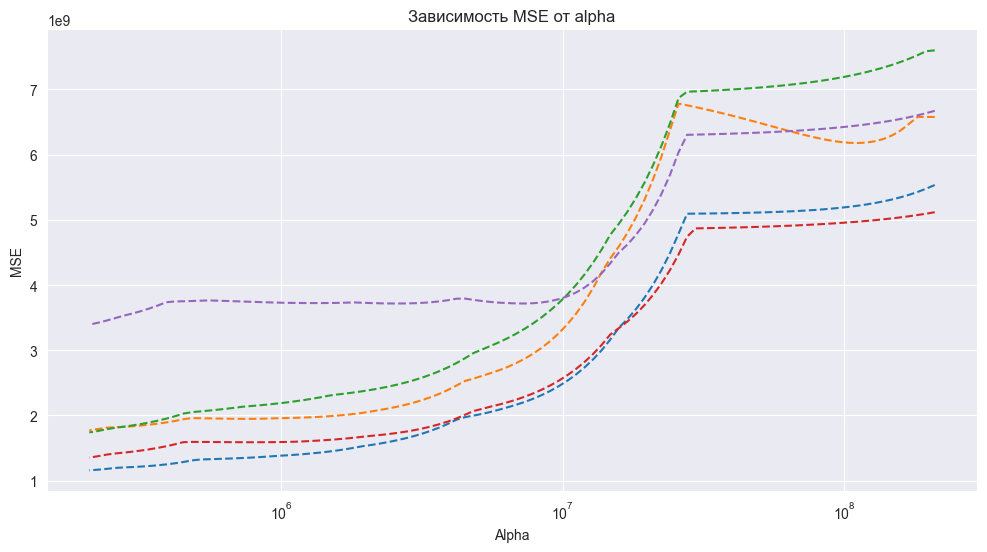

In [50]:
mse_path = lasso_cv.mse_path_
plt.figure(figsize=(12, 6))
plt.plot(lasso_cv.alphas_, mse_path, linestyle='--')
plt.title('Зависимость MSE от alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

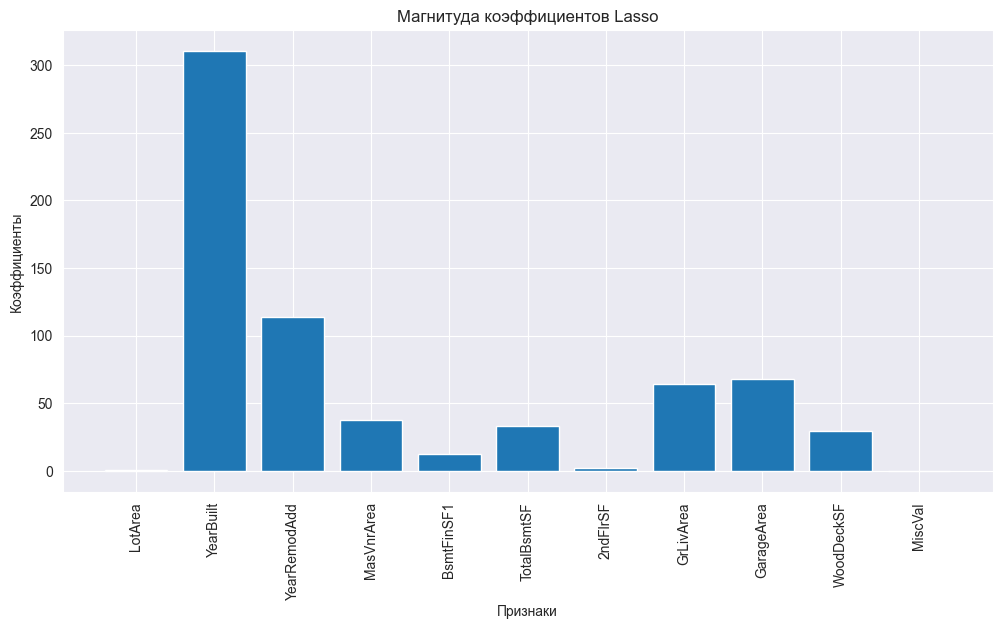

In [51]:
coeffs = lasso_cv.coef_
non_zero_coeffs = coeffs[coeffs != 0]
plt.figure(figsize=(12, 6))
plt.bar(range(len(non_zero_coeffs)), non_zero_coeffs)
plt.title('Магнитуда коэффициентов Lasso')
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.xticks(range(len(non_zero_coeffs)), X.columns[coeffs != 0], rotation=90)
plt.show()

In [52]:
print(f"Количество ненулевых признаков: {np.sum(coeffs != 0)}")
mse_scores_lasso = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка предсказания (MSE) для Lasso: {-mse_scores_lasso.mean()}")

Количество ненулевых признаков: 11
Средняя ошибка предсказания (MSE) для Lasso: 1885748973.7168374


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
})

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")


Размерность X_train: (67, 2)
Размерность X_test: (33, 2)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [54]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

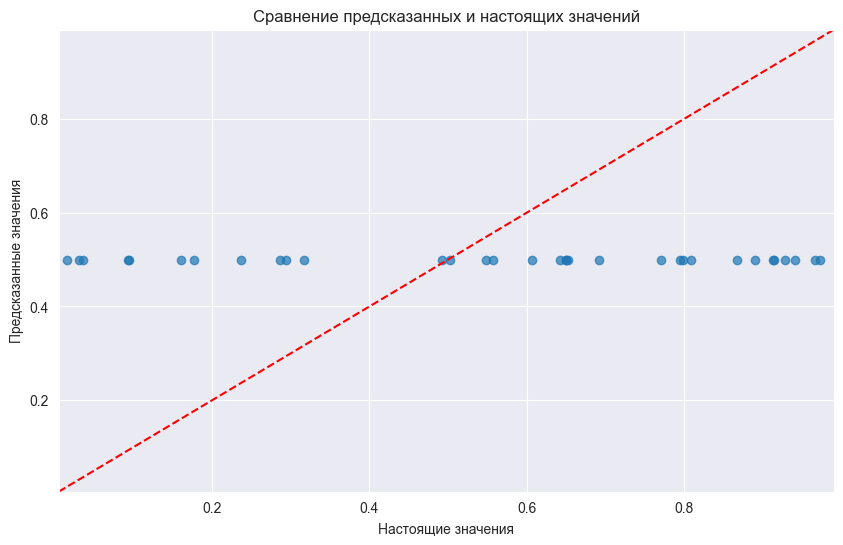

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказанных и настоящих значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid(True)
plt.show()


## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [56]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

df = pd.read_csv('data/house_prices.csv', index_col='Id')

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

print("Проверка на наличие пропущенных значений:")
print(X.isnull().sum())

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1, max_iter=10000))
])

mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -mse_scores.mean()
print("Среднее значение MSE:", mean_mse)

Проверка на наличие пропущенных значений:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64
Среднее значение MSE: 1293830966.11529


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels